# Preprocessing train data

In [76]:
import numpy as np 
import pandas as pd 


In [77]:
data = pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      int64  
 1   index           int64  
 2   elapsed_time    int64  
 3   event_name      object 
 4   name            object 
 5   level           int64  
 6   page            float64
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      int64  
 17  hq              int64  
 18  music           int64  
 19  level_group     object 
dtypes: float64(6), int64(7), object(7)
memory usage: 3.9+ GB


In [78]:
data

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296941,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296942,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296943,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296944,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22


##### As we could see, theres' over 13 000 000 rows and disk memory over 2.3 GB. Later we try to decrease this.

## 1. Have an Overview of data

In [79]:
data.describe(include='all')

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
count,2.629695e+07,2.629695e+07,2.629695e+07,26296946,26296946,2.629695e+07,564544.000000,2.422367e+07,2.422367e+07,2.422367e+07,2.422367e+07,2.002244e+06,9617139,18022531,26296946,9617244,2.629695e+07,2.629695e+07,2.629695e+07,26296946
unique,NaN,NaN,NaN,11,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597,128,19,126,NaN,NaN,NaN,3
top,NaN,NaN,NaN,navigate_click,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,worker,tunic.historicalsociety.entry,tunic.historicalsociety.cage.confrontation,NaN,NaN,NaN,13-22
freq,NaN,NaN,NaN,11326433,12705785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355969,1878958,3622003,666557,NaN,NaN,NaN,13471703
mean,2.113249e+16,6.445102e+02,4.016694e+06,NaN,NaN,1.219169e+01,3.166559,-5.490579e+01,-1.162119e+02,4.584098e+02,3.855860e+02,3.471003e+03,NaN,NaN,NaN,NaN,1.370037e-01,1.202047e-01,9.293778e-01,NaN
std,5.712953e+14,5.457880e+02,3.127032e+07,NaN,NaN,6.497789e+00,2.063291,5.202926e+02,2.184710e+02,2.479389e+02,1.298166e+02,4.602024e+05,NaN,NaN,NaN,NaN,3.438513e-01,3.252008e-01,2.561926e-01,NaN
min,2.009031e+16,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000,-1.992355e+03,-9.181623e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,2.101022e+16,2.880000e+02,4.397000e+05,NaN,NaN,6.000000e+00,1.000000,-3.528395e+02,-2.127183e+02,2.690000e+02,3.040000e+02,9.900000e+01,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,NaN
50%,2.104021e+16,5.950000e+02,1.014801e+06,NaN,NaN,1.300000e+01,3.000000,-1.116280e+01,-9.760534e+01,4.470000e+02,3.970000e+02,4.190000e+02,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,NaN
75%,2.110052e+16,8.960000e+02,1.747040e+06,NaN,NaN,1.800000e+01,5.000000,2.966515e+02,2.268786e+01,6.630000e+02,4.710000e+02,1.266000e+03,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,NaN


In [80]:
print(data.head(50))

           session_id  index  elapsed_time          event_name       name  \
0   20090312431273200      0             0      cutscene_click      basic   
1   20090312431273200      1          1323        person_click      basic   
2   20090312431273200      2           831        person_click      basic   
3   20090312431273200      3          1147        person_click      basic   
4   20090312431273200      4          1863        person_click      basic   
5   20090312431273200      5          3423        person_click      basic   
6   20090312431273200      6          5197        person_click      basic   
7   20090312431273200      7          6180        person_click      basic   
8   20090312431273200      8          7014        person_click      basic   
9   20090312431273200      9          7946        person_click      basic   
10  20090312431273200     10          9133      navigate_click  undefined   
11  20090312431273200     11         10263        person_click      basic   

## 2. Wipe out NA values

##### Here we could see three columns all filled with NaN values. Drop them

In [81]:
## drop those columns as NA
data = data.drop(['music','hq','fullscreen'], axis=1)
print(data.head(50))

           session_id  index  elapsed_time          event_name       name  \
0   20090312431273200      0             0      cutscene_click      basic   
1   20090312431273200      1          1323        person_click      basic   
2   20090312431273200      2           831        person_click      basic   
3   20090312431273200      3          1147        person_click      basic   
4   20090312431273200      4          1863        person_click      basic   
5   20090312431273200      5          3423        person_click      basic   
6   20090312431273200      6          5197        person_click      basic   
7   20090312431273200      7          6180        person_click      basic   
8   20090312431273200      8          7014        person_click      basic   
9   20090312431273200      9          7946        person_click      basic   
10  20090312431273200     10          9133      navigate_click  undefined   
11  20090312431273200     11         10263        person_click      basic   

## 3 Change Data type to save memory space

In [82]:
data['elapsed_time'] = data['elapsed_time'].astype(np.uint32)
data['level'] = data['level'].astype(np.uint8)
data['room_coor_x'] = data['room_coor_x'].astype(np.float32)
data['room_coor_y'] = data['room_coor_y'].astype(np.float32)
data['screen_coor_x'] = data['screen_coor_x'].astype(np.float32)
data['screen_coor_y'] = data['screen_coor_y'].astype(np.float32)
data['hover_duration'] = data['hover_duration'].astype(np.float32)


columns_to_convert = ['session_id','event_name','name','text','fqid','room_fqid','text_fqid','level_group']

for column in columns_to_convert:
    data[column] = data[column].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 17 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      category
 1   index           int64   
 2   elapsed_time    uint32  
 3   event_name      category
 4   name            category
 5   level           uint8   
 6   page            float64 
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  level_group     category
dtypes: category(8), float32(5), float64(1), int64(1), uint32(1), uint8(1)
memory usage: 1.3 GB


##### Great! Now we reduced 2.3 GB to 653.7 MB, saved around 77% memory space!
##### However, the results of answer (which we need to predict is in another file), we combine it now

## 4. Combine Predictor Data

### 4.1 Preprocess Predictor Data

In [83]:
# import response data
predictorData = pd.read_csv("train_labels.csv")
predictorData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424116 entries, 0 to 424115
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   session_id  424116 non-null  object
 1   correct     424116 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.5+ MB


In [84]:
predictorData.describe(include='all')

,session_id,correct
count,424116,424116.000000
unique,424116,NaN
top,20090312431273200_q1,NaN
freq,1,NaN
mean,NaN,0.705635
std,NaN,0.455757
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [85]:
print(predictorData.head(100))

              session_id  correct
0   20090312431273200_q1        1
1   20090312433251036_q1        0
2   20090312455206810_q1        1
3   20090313091715820_q1        0
4   20090313571836404_q1        1
..                   ...      ...
95  20100020201084828_q1        1
96  20100020201560770_q1        1
97  20100020512263948_q1        1
98  20100021100648030_q1        1
99  20100022495909980_q1        1

[100 rows x 2 columns]


##### As we see, we can't simply combine it as not well being preprocessed. 
##### We extract useful information now

In [86]:
# 1. split the "session_id" column into "sessionID" and "qns"
split_predictorData = predictorData['session_id'].str.split("_", expand=True)
# rename the headers
split_predictorData = split_predictorData.rename(columns={split_predictorData.columns[0]: 'sessionID', split_predictorData.columns[1]: 'qns'})
# combine the dataframe of the 2 split items and the correct column of the original dataframe
processed_predictorData = pd.concat([split_predictorData, predictorData['correct']], axis=1)
#change datatype for 'correct' column from int64 to object (CONSIDER 'BOOL' INSTEAD)
processed_predictorData['correct'] = processed_predictorData['correct'].astype('object')

# 2. split the "qns" column into "q" and "question id"
split_qns = processed_predictorData['qns'].str.split("q", expand=True)
split_qns = split_qns.rename(columns={split_qns.columns[0]: 'q', split_qns.columns[1]: 'qns'})
# combine the dataframe of the 'qns' into processed_predictorData
processed_predictorData_sortedBySessionID = pd.concat([processed_predictorData['sessionID'], split_qns['qns'], processed_predictorData['correct']], axis=1)
# convert the datatype of qns to integer for sorting
processed_predictorData_sortedBySessionID['qns'] = processed_predictorData_sortedBySessionID['qns'].astype('int')
# sort the dataset according to ascending order of the 'sessionID' and 'qns'
processed_predictorData_sortedBySessionID = processed_predictorData_sortedBySessionID.sort_values(['sessionID', 'qns'], ascending=[True, True])
# reset the index
processed_predictorData_sortedBySessionID = processed_predictorData_sortedBySessionID.reset_index(drop=True)
processed_predictorData_sortedBySessionID.info()

# 3. Have a overview of data
print(processed_predictorData_sortedBySessionID.head(50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424116 entries, 0 to 424115
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sessionID  424116 non-null  object
 1   qns        424116 non-null  int32 
 2   correct    424116 non-null  object
dtypes: int32(1), object(2)
memory usage: 8.1+ MB
            sessionID  qns correct
0   20090312431273200    1       1
1   20090312431273200    2       1
2   20090312431273200    3       1
3   20090312431273200    4       1
4   20090312431273200    5       1
5   20090312431273200    6       1
6   20090312431273200    7       1
7   20090312431273200    8       1
8   20090312431273200    9       1
9   20090312431273200   10       1
10  20090312431273200   11       1
11  20090312431273200   12       1
12  20090312431273200   13       0
13  20090312431273200   14       1
14  20090312431273200   15       1
15  20090312431273200   16       0
16  20090312431273200   17       1
17  200903

### 4.2 Combine with train data by splitting into 3 sections 

#### To further reduce data set and implement data science skills we learned, we extract one characteristic value for each column and merge it with the results dataframe for future prediction.

##### We train one model for each of 18 questions. Furthermore, we use data from level_groups = '0-4' to train model for questions 1-3, and level groups '5-12' to train questions 4 thru 13 and level groups '13-22' to train questions 14 thru 18. Because this is the data we get (to predict corresponding questions) from Kaggle's inference API during test inference. We can improve our model by saving a user's previous data from earlier level_groups and using that to predict future level_groups

##### First we divide predictor data into three session

In [87]:
sub1 = processed_predictorData_sortedBySessionID[processed_predictorData_sortedBySessionID['qns']<4]
sub1 = sub1.sort_values(['sessionID', 'qns']).reset_index()
sub1 = sub1.drop(['index'],axis=1)

sub2 = processed_predictorData_sortedBySessionID[processed_predictorData_sortedBySessionID['qns']>=4]
sub2 = sub2[sub2['qns']<14]
sub2 = sub2.sort_values(['sessionID', 'qns']).reset_index()
sub2 = sub2.drop(['index'],axis=1)

sub3 = processed_predictorData_sortedBySessionID[processed_predictorData_sortedBySessionID['qns']>=14]
sub3 = sub3.sort_values(['sessionID', 'qns']).reset_index()
sub3 = sub3.drop(['index'],axis=1)

display(
sub1,
sub2,
sub3)

,sessionID,qns,correct
0,20090312431273200,1,1
1,20090312431273200,2,1
2,20090312431273200,3,1
3,20090312433251036,1,0
4,20090312433251036,2,1
...,...,...,...
70681,22100219442786200,2,1
70682,22100219442786200,3,1
70683,22100221145014656,1,0
70684,22100221145014656,2,1


,sessionID,qns,correct
0,20090312431273200,4,1
1,20090312431273200,5,1
2,20090312431273200,6,1
3,20090312431273200,7,1
4,20090312431273200,8,1
...,...,...,...
235615,22100221145014656,9,1
235616,22100221145014656,10,0
235617,22100221145014656,11,1
235618,22100221145014656,12,1


,sessionID,qns,correct
0,20090312431273200,14,1
1,20090312431273200,15,1
2,20090312431273200,16,0
3,20090312431273200,17,1
4,20090312431273200,18,1
...,...,...,...
117805,22100221145014656,14,0
117806,22100221145014656,15,0
117807,22100221145014656,16,0
117808,22100221145014656,17,1


### Then we start to divide variable dataframe according to game stages

In [88]:
test = data.sort_values(['session_id', 'level_group'], ascending=[True, True])
test

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296181,22100221145014656,795,3664936,navigate_click,undefined,12,NaN,939.575623,92.873199,805.0,268.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
26296182,22100221145014656,796,3665912,map_hover,basic,12,NaN,NaN,NaN,NaN,NaN,600.0,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
26296183,22100221145014656,797,3666188,map_click,undefined,12,NaN,486.913300,50.747986,465.0,298.0,NaN,NaN,tunic.capitol_1,tunic.historicalsociety.entry,NaN,5-12
26296184,22100221145014656,798,3667021,navigate_click,undefined,12,NaN,210.553955,-140.571701,395.0,390.0,NaN,NaN,chap2_finale_c,tunic.capitol_1.hall,NaN,5-12


##### Section 1

In [89]:
data1 = test[test['level_group'] == '0-4']
data1

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26295605,22100221145014656,206,352635,navigate_click,undefined,4,NaN,-914.204224,-50.000000,26.0,380.0,NaN,NaN,toentry,tunic.kohlcenter.halloffame,NaN,0-4
26295606,22100221145014656,207,353336,map_hover,basic,4,NaN,NaN,NaN,NaN,NaN,84.0,NaN,tunic.kohlcenter,tunic.kohlcenter.halloffame,NaN,0-4
26295607,22100221145014656,208,354020,map_click,undefined,4,NaN,-549.217712,-2.000000,449.0,332.0,NaN,NaN,tunic.capitol_0,tunic.kohlcenter.halloffame,NaN,0-4
26295608,22100221145014656,209,356238,navigate_click,undefined,4,NaN,313.584259,107.913147,463.0,226.0,NaN,NaN,chap1_finale,tunic.capitol_0.hall,NaN,0-4


## How do we extract each characteristic value for each column?


### 1. Elapsed_time -> (total) elasped_time: The last value of each participant, which is the total time of elapsed time.
### 2. Event_name && Name -> Most click type: After deleting the most common navigate_click(click to proceed moving forward in game), we retain select the most click type (map, object, notebook, person)
### 3. Level -> deletion. As it only indicates which stage of game.
### 4. Page -> (bool) this value represents whether player clicked notebook or not. (Notebook is important for clue collection)
### 5. "room_coor_x	room_coor_y	screen_coor_x	screen_coor_y" -> Fullscreen. Although fullscreen is NaN and thus deleted previously, by evaluating those four parameters, we can derive whether it's fullscreen or not.
### 6. Hover_duration-> (mean) hover_duration. It reflects how long does the play pause the mouse.
### 7. "text	 fqid	room_fqid	text_fqid"-> deletion. As it's just the responses from game NPCs.
### 8. "level_group correct" : retain

## Overall for categorical values, since we're preprocessing them into binary categorical values, we temtatively just use label encoding rather than one-hot encoding as one-hot encoding may not provide significant benefits but also creates too many columns.

In [90]:
# factor 1
total_elapsed_time = data1.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

# factor 2
filtered_data = data1[(data1['event_name'] != 'navigate_click') & (data1['event_name'] != 'cutscene_click')]
mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

# factor 3
avg_page = data1.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
avg_page = avg_page.rename(columns={'page': 'avg_page'})

# factor 4

# Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
max_values = data1.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

# Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

# Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

# Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
unique_session_ids = data1['session_id'].unique()
unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

# Rename the 'fullscreen' column to 'fullscreen_flag'
unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})



# factor 5
avg_hover_duration = data1.groupby(['session_id'])['hover_duration'].mean().reset_index()

# Merge
temp_level_group = pd.DataFrame({'level_group': ['0-4'] * 23562})
part1 = pd.concat([avg_hover_duration['session_id'], 
                   total_elapsed_time['elapsed_time'], 
                   mode_event_name['event_name'], avg_page['avg_page'],
                     unique_session_ids_fullscreen['fullscreen_flag'],
                       avg_hover_duration['hover_duration'], 
                         temp_level_group['level_group']]
                          , axis = 1)


part1 = pd.concat([part1]*3, ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)

values = [1,2,3]
for i in range(0,70686):
    part1.iloc[i, -1] = values[i % len(values)]
        
part1 = part1.rename(columns={'level_group': 'qns'})
part1 = pd.concat([part1, sub1['correct']], axis = 1)

part1

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,194860,person_click,0,1,2389.50000,1,1
1,20090312431273200,194860,person_click,0,1,2389.50000,2,1
2,20090312431273200,194860,person_click,0,1,2389.50000,3,1
3,20090312433251036,233752,person_click,1,1,1378.75000,1,0
4,20090312433251036,233752,person_click,1,1,1378.75000,2,1
...,...,...,...,...,...,...,...,...
70681,22100219442786200,191727,person_click,1,1,3337.50000,2,1
70682,22100219442786200,191727,person_click,1,1,3337.50000,3,1
70683,22100221145014656,435055,object_click,1,1,4164.63623,1,0
70684,22100221145014656,435055,object_click,1,1,4164.63623,2,1


##### Section 2

In [91]:
data2 = test[test['level_group'] == '5-12']
data2

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
165,20090312431273200,175,221485,navigate_click,undefined,5,NaN,280.442169,-19.705837,653.0,321.0,NaN,NaN,boss,tunic.capitol_0.hall,NaN,5-12
166,20090312431273200,176,222334,person_click,basic,5,NaN,272.983490,-19.233582,649.0,321.0,NaN,"What are you still doing here, Jolie?",boss,tunic.capitol_0.hall,tunic.capitol_0.hall.boss.talktogramps,5-12
167,20090312431273200,177,223251,person_click,basic,5,NaN,240.848419,-228.217453,628.0,459.0,NaN,Go find your grampa and get to work!,boss,tunic.capitol_0.hall,tunic.capitol_0.hall.boss.talktogramps,5-12
168,20090312431273200,178,223735,navigate_click,undefined,5,NaN,331.714691,-220.627228,688.0,454.0,NaN,NaN,NaN,tunic.capitol_0.hall,NaN,5-12
169,20090312431273200,179,224235,navigate_click,undefined,5,NaN,404.147217,-226.491394,716.0,454.0,NaN,NaN,NaN,tunic.capitol_0.hall,NaN,5-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296181,22100221145014656,795,3664936,navigate_click,undefined,12,NaN,939.575623,92.873199,805.0,268.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
26296182,22100221145014656,796,3665912,map_hover,basic,12,NaN,NaN,NaN,NaN,NaN,600.0,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
26296183,22100221145014656,797,3666188,map_click,undefined,12,NaN,486.913300,50.747986,465.0,298.0,NaN,NaN,tunic.capitol_1,tunic.historicalsociety.entry,NaN,5-12
26296184,22100221145014656,798,3667021,navigate_click,undefined,12,NaN,210.553955,-140.571701,395.0,390.0,NaN,NaN,chap2_finale_c,tunic.capitol_1.hall,NaN,5-12


In [92]:
# factor 1
total_elapsed_time = data2.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

# factor 2
filtered_data = data2[(data2['event_name'] != 'navigate_click') & (data2['event_name'] != 'cutscene_click')]
mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

# factor 3
avg_page = data2.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
avg_page = avg_page.rename(columns={'page': 'avg_page'})

# factor 4

# Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
max_values = data2.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

# Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

# Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

# Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
unique_session_ids = data2['session_id'].unique()
unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

# Rename the 'fullscreen' column to 'fullscreen_flag'
unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})



# factor 5
avg_hover_duration = data2.groupby(['session_id'])['hover_duration'].mean().reset_index()

# Merge
temp_level_group = pd.DataFrame({'level_group': ['5-12'] * 23562})
part2 = pd.concat([avg_hover_duration['session_id'], 
                   total_elapsed_time['elapsed_time'], 
                   mode_event_name['event_name'], avg_page['avg_page'],
                     unique_session_ids_fullscreen['fullscreen_flag'],
                       avg_hover_duration['hover_duration'], 
                         temp_level_group['level_group']]
                          , axis = 1)

part2 = pd.concat([part2]*10, ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)

values = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for i in range(0,235620):
    part2.iloc[i, -1] = values[i % len(values)]
        
part2 = part2.rename(columns={'level_group': 'qns'})
part2 = pd.concat([part2, sub2['correct']], axis = 1)

part2

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,499235,person_click,0,1,969.333313,4,1
1,20090312431273200,499235,person_click,0,1,969.333313,5,1
2,20090312431273200,499235,person_click,0,1,969.333313,6,1
3,20090312431273200,499235,person_click,0,1,969.333313,7,1
4,20090312431273200,499235,person_click,0,1,969.333313,8,1
...,...,...,...,...,...,...,...,...
235615,22100221145014656,3668994,person_click,1,1,1901.327881,9,1
235616,22100221145014656,3668994,person_click,1,1,1901.327881,10,0
235617,22100221145014656,3668994,person_click,1,1,1901.327881,11,1
235618,22100221145014656,3668994,person_click,1,1,1901.327881,12,1


##### Section 3

In [93]:
data3 = test[test['level_group'] == '13-22']
data3

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
461,20090312431273200,512,836732,navigate_click,undefined,13,NaN,290.153564,-204.499359,651.0,445.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,13-22
462,20090312431273200,513,837245,navigate_click,undefined,13,NaN,353.805603,-210.332062,672.0,445.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,13-22
463,20090312431273200,514,837779,navigate_click,undefined,13,NaN,587.680054,-280.706238,780.0,489.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,13-22
464,20090312431273200,515,838446,navigate_click,undefined,13,NaN,751.496887,-102.153290,823.0,365.0,NaN,NaN,toentry,tunic.capitol_1.hall,NaN,13-22
465,20090312431273200,516,839629,map_hover,basic,13,NaN,NaN,NaN,NaN,NaN,67.0,NaN,tunic.drycleaner,tunic.capitol_1.hall,NaN,13-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296941,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887299,36.701027,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
26296942,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696075,141.493179,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22
26296943,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912872,140.569199,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
26296944,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299652,123.805893,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22


In [94]:
# factor 1
total_elapsed_time = data3.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

# factor 2
filtered_data = data3[(data3['event_name'] != 'navigate_click') & (data3['event_name'] != 'cutscene_click')]
mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

# factor 3
avg_page = data3.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
avg_page = avg_page.rename(columns={'page': 'avg_page'})

# factor 4

# Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
max_values = data3.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

# Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

# Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

# Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
unique_session_ids = data3['session_id'].unique()
unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

# Rename the 'fullscreen' column to 'fullscreen_flag'
unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})



# factor 5
avg_hover_duration = data3.groupby(['session_id'])['hover_duration'].mean().reset_index()

# Merge
temp_level_group = pd.DataFrame({'level_group': ['13-22'] * 23562})
part3 = pd.concat([avg_hover_duration['session_id'], 
                   total_elapsed_time['elapsed_time'], 
                   mode_event_name['event_name'], avg_page['avg_page'],
                     unique_session_ids_fullscreen['fullscreen_flag'],
                       avg_hover_duration['hover_duration'], 
                         temp_level_group['level_group']]
                          , axis = 1)

part3 = pd.concat([part3]*5, ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)

values = [14, 15, 16, 17, 18]
for i in range(0,117810):
    part3.iloc[i, -1] = values[i % len(values)]
        
part3 = part3.rename(columns={'level_group': 'qns'})
part3 = pd.concat([part3, sub3['correct']], axis = 1)

part3

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,1272679,person_click,0,1,899.925903,14,1
1,20090312431273200,1272679,person_click,0,1,899.925903,15,1
2,20090312431273200,1272679,person_click,0,1,899.925903,16,0
3,20090312431273200,1272679,person_click,0,1,899.925903,17,1
4,20090312431273200,1272679,person_click,0,1,899.925903,18,1
...,...,...,...,...,...,...,...,...
117805,22100221145014656,5487952,person_click,1,1,669.000000,14,0
117806,22100221145014656,5487952,person_click,1,1,669.000000,15,0
117807,22100221145014656,5487952,person_click,1,1,669.000000,16,0
117808,22100221145014656,5487952,person_click,1,1,669.000000,17,1


### 4.3 Final Step for combining dataset together

In [95]:
new_data = pd.concat([part1, part2, part3], axis = 0)
new_data

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,194860,person_click,0,1,2389.50,1,1
1,20090312431273200,194860,person_click,0,1,2389.50,2,1
2,20090312431273200,194860,person_click,0,1,2389.50,3,1
3,20090312433251036,233752,person_click,1,1,1378.75,1,0
4,20090312433251036,233752,person_click,1,1,1378.75,2,1
...,...,...,...,...,...,...,...,...
117805,22100221145014656,5487952,person_click,1,1,669.00,14,0
117806,22100221145014656,5487952,person_click,1,1,669.00,15,0
117807,22100221145014656,5487952,person_click,1,1,669.00,16,0
117808,22100221145014656,5487952,person_click,1,1,669.00,17,1


In [96]:
new_data = new_data.sort_values(['session_id', 'qns'], ascending=[True, True]).reset_index().drop(['index'], axis=1)
new_data

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,194860,person_click,0,1,2389.500000,1,1
1,20090312431273200,194860,person_click,0,1,2389.500000,2,1
2,20090312431273200,194860,person_click,0,1,2389.500000,3,1
3,20090312431273200,499235,person_click,0,1,969.333313,4,1
4,20090312431273200,499235,person_click,0,1,969.333313,5,1
...,...,...,...,...,...,...,...,...
424111,22100221145014656,5487952,person_click,1,1,669.000000,14,0
424112,22100221145014656,5487952,person_click,1,1,669.000000,15,0
424113,22100221145014656,5487952,person_click,1,1,669.000000,16,0
424114,22100221145014656,5487952,person_click,1,1,669.000000,17,1


### As shown above, for each player we divide the whole process into 3 stages according to level group, and for each stage we extract characteristic data and form 5 total columns that related to their performance. And then we append the 18 qns' results in the end of each row for each participants. In total there's 18 qns * 11779 participants = 212022 rows, and 8 columns. EDA can start with this new_data.

### Before we go to model however, we create alternative dataframe here using one-hot encoding to fit in models like decision tree.

In [97]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()


# OneHotEncoding of categorical predictors (not the response)
new_data_cat = new_data[['event_name']]
ohe.fit(new_data_cat)
new_data_cat_ohe = pd.DataFrame(ohe.transform(new_data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(new_data_cat.columns))

# Check the encoded variables
new_data_cat_ohe.info()
new_data_cat_ohe



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424116 entries, 0 to 424115
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   event_name_map_click           424116 non-null  float64
 1   event_name_map_hover           424116 non-null  float64
 2   event_name_notebook_click      424116 non-null  float64
 3   event_name_notification_click  424116 non-null  float64
 4   event_name_object_click        424116 non-null  float64
 5   event_name_object_hover        424116 non-null  float64
 6   event_name_observation_click   424116 non-null  float64
 7   event_name_person_click        424116 non-null  float64
dtypes: float64(8)
memory usage: 25.9 MB


,event_name_map_click,event_name_map_hover,event_name_notebook_click,event_name_notification_click,event_name_object_click,event_name_object_hover,event_name_observation_click,event_name_person_click
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
424111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
424112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
424113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
424114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [98]:
# Combine with original data
new_data_num = new_data[['session_id','elapsed_time','avg_page','fullscreen_flag','hover_duration','qns']]
new_data_res = new_data['correct']
ohe_data = pd.concat([new_data_num, new_data_cat_ohe, new_data_res], 
                           sort = False, axis = 1).reindex(index=new_data_num.index)

# Check the final dataframe
ohe_data.info()
ohe_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424116 entries, 0 to 424115
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   session_id                     424116 non-null  category
 1   elapsed_time                   424116 non-null  uint32  
 2   avg_page                       424116 non-null  int32   
 3   fullscreen_flag                424116 non-null  int32   
 4   hover_duration                 390412 non-null  float32 
 5   qns                            424116 non-null  object  
 6   event_name_map_click           424116 non-null  float64 
 7   event_name_map_hover           424116 non-null  float64 
 8   event_name_notebook_click      424116 non-null  float64 
 9   event_name_notification_click  424116 non-null  float64 
 10  event_name_object_click        424116 non-null  float64 
 11  event_name_object_hover        424116 non-null  float64 
 12  event_name_obser

,session_id,elapsed_time,avg_page,fullscreen_flag,hover_duration,qns,event_name_map_click,event_name_map_hover,event_name_notebook_click,event_name_notification_click,event_name_object_click,event_name_object_hover,event_name_observation_click,event_name_person_click,correct
0,20090312431273200,194860,0,1,2389.500000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,20090312431273200,194860,0,1,2389.500000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,20090312431273200,194860,0,1,2389.500000,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,20090312431273200,499235,0,1,969.333313,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,20090312431273200,499235,0,1,969.333313,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424111,22100221145014656,5487952,1,1,669.000000,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
424112,22100221145014656,5487952,1,1,669.000000,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
424113,22100221145014656,5487952,1,1,669.000000,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
424114,22100221145014656,5487952,1,1,669.000000,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


## Notice here we have ohe_data as alternative dataframe for model fitting.
## We hereby wrap up the preprocessing.

## 3. Model

### 3.1 Decision Tree Model

In [99]:
print(ohe_data['correct'].dtypes) 

object


D:\UsefulSoftware\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Text(0.5, 0.9, 'qns <= 4.5\ngini = 0.415\nsamples = 296881\nvalue = [87368, 209513]\nclass = Good'),
 Text(0.25, 0.7, 'qns <= 1.5\ngini = 0.241\nsamples = 66088\nvalue = [9282, 56806]\nclass = Good'),
 Text(0.125, 0.5, 'event_name_person_click <= 0.5\ngini = 0.398\nsamples = 16476\nvalue = [4517, 11959]\nclass = Good'),
 Text(0.0625, 0.3, 'elapsed_time <= 379675.5\ngini = 0.487\nsamples = 2845\nvalue = [1190, 1655]\nclass = Good'),
 Text(0.03125, 0.1, 'gini = 0.467\nsamples = 1680\nvalue = [625, 1055]\nclass = Good'),
 Text(0.09375, 0.1, 'gini = 0.5\nsamples = 1165\nvalue = [565, 600]\nclass = Good'),
 Text(0.1875, 0.3, 'elapsed_time <= 298334.0\ngini = 0.369\nsamples = 13631\nvalue = [3327, 10304]\nclass = Good'),
 Text(0.15625, 0.1, 'gini = 0.329\nsamples = 8694\nvalue = [1807, 6887]\nclass = Good'),
 Text(0.21875, 0.1, 'gini = 0.426\nsamples = 4937\nvalue = [1520, 3417]\nclass = Good'),
 Text(0.375, 0.5, 'qns <= 3.5\ngini = 0.174\nsamples = 49612\nvalue = [4765, 44847]\nclass = Goo

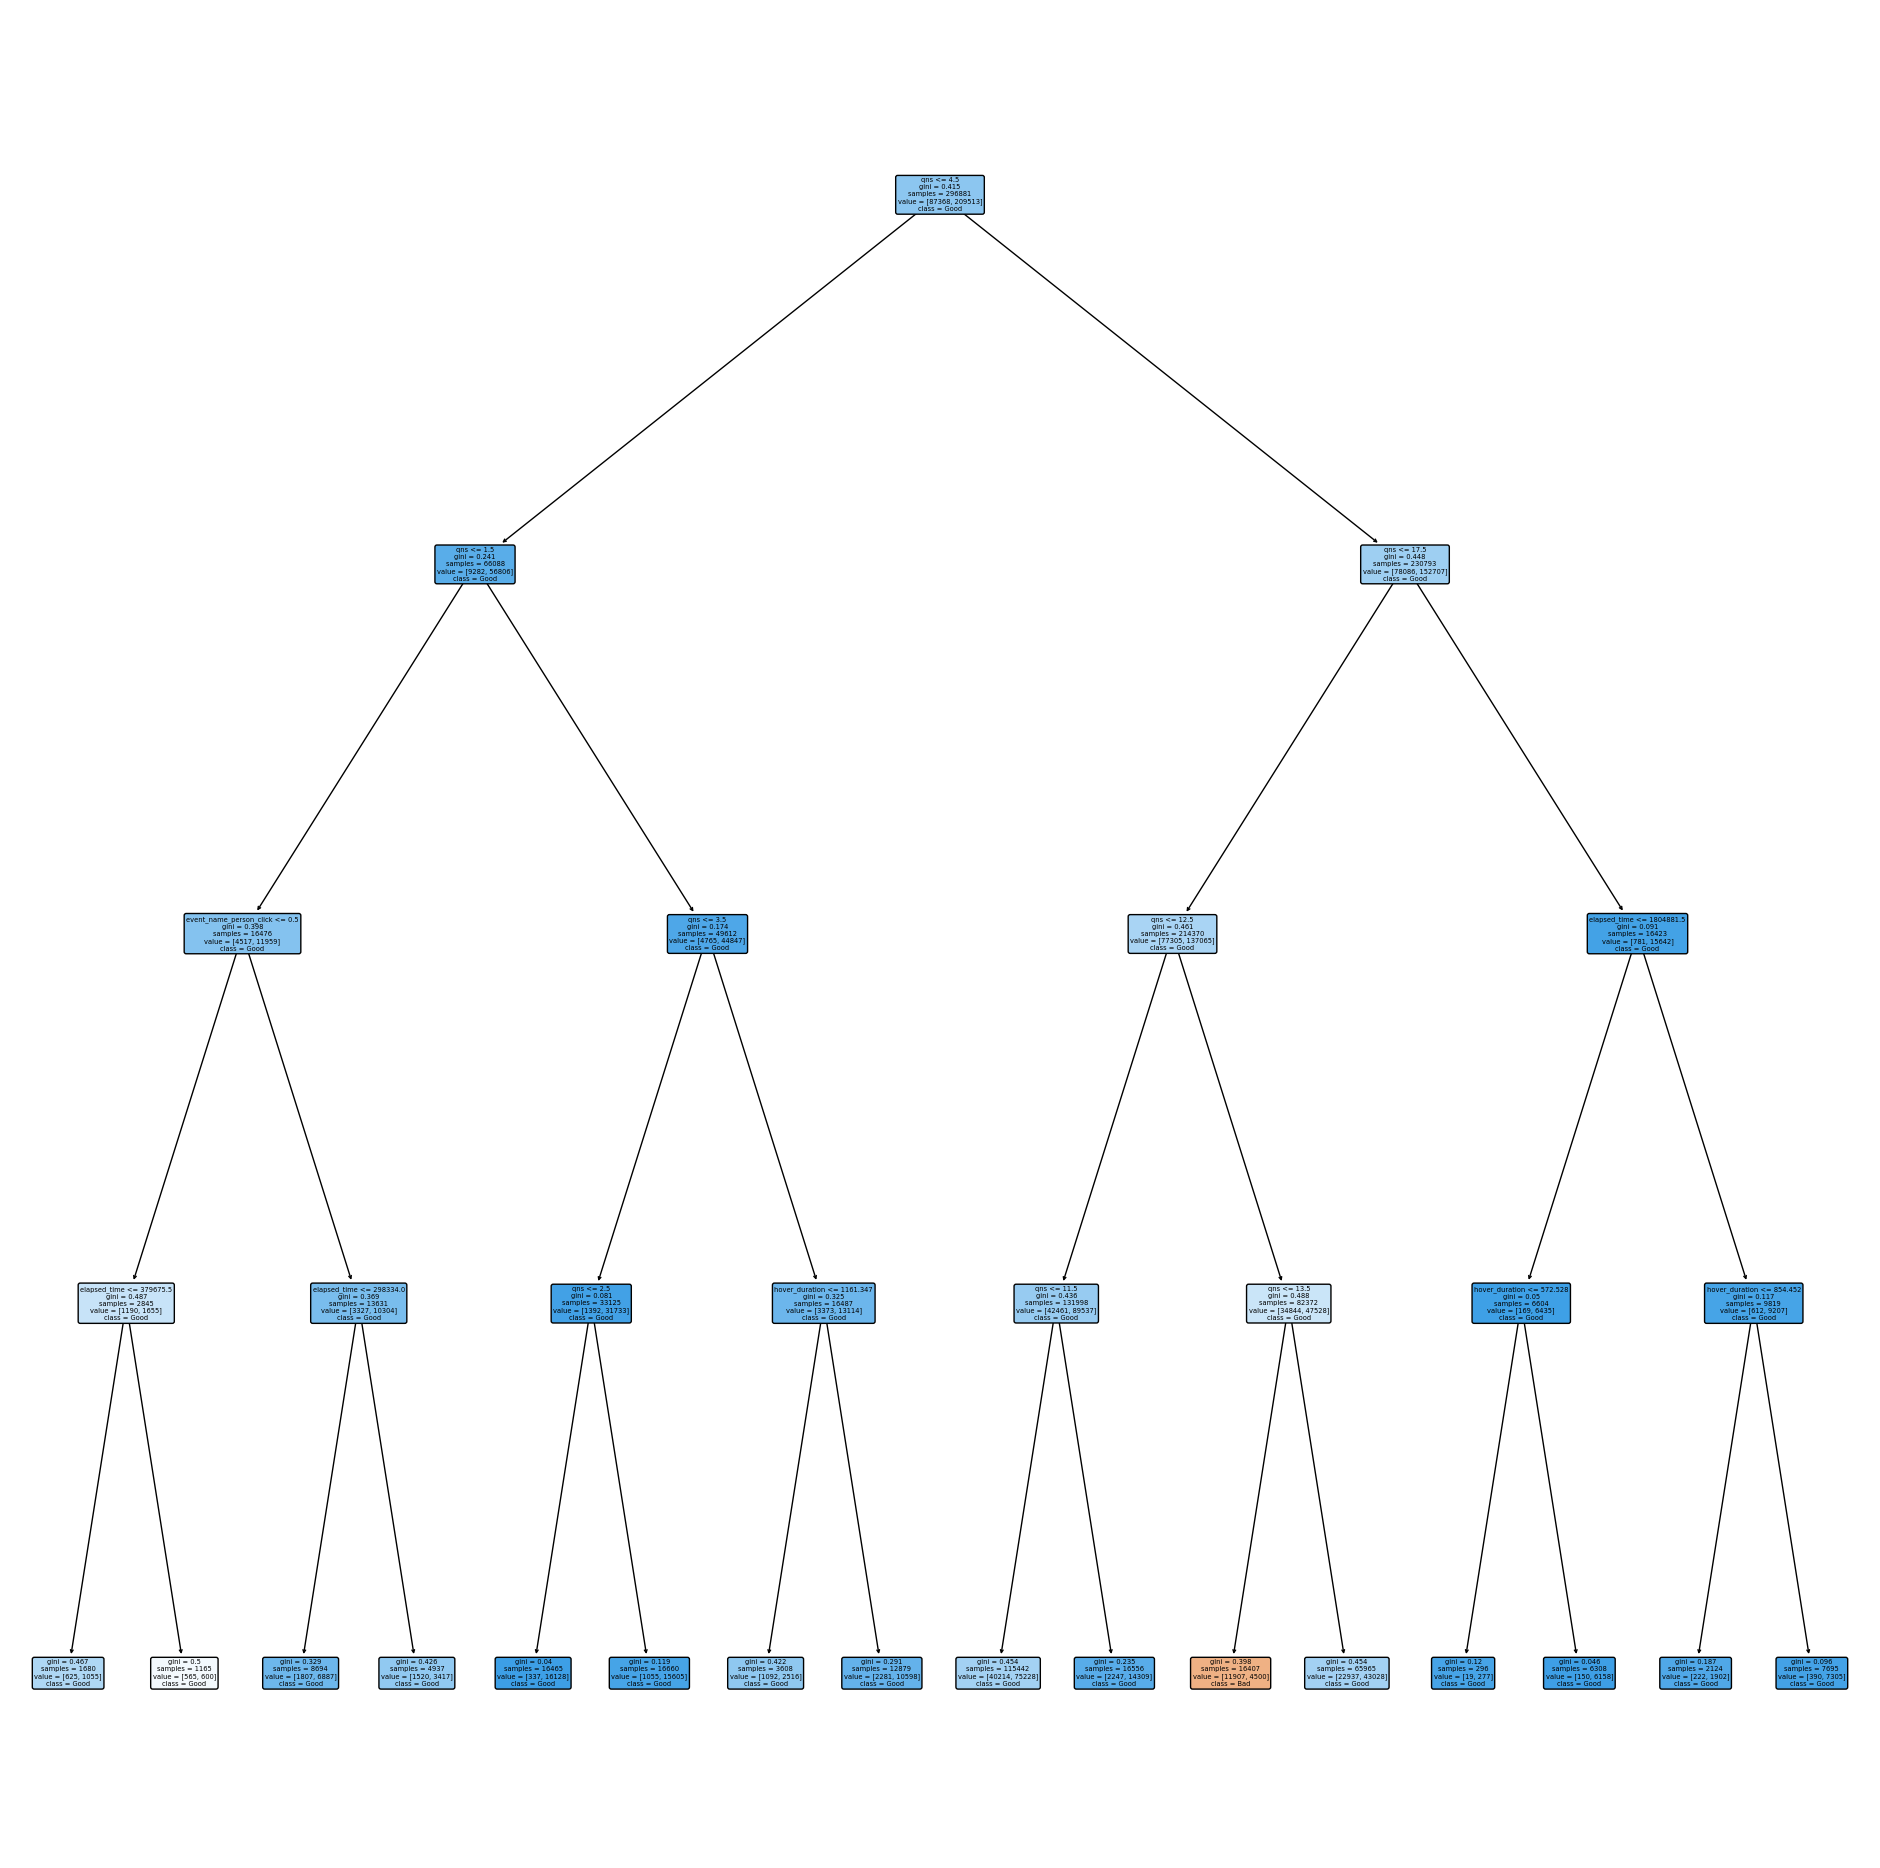

In [100]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Extract Response and Predictors

y = pd.DataFrame(ohe_data['correct'])

# We using labe_lencoder to solve y data type issues.
from sklearn.preprocessing import LabelEncoder
# Instantiate the LabelEncoder
le = LabelEncoder()
# Fit and transform the target variable
y = le.fit_transform(y)

## Here We also drop session_id as it's not related to model
# X = pd.DataFrame(new_data.drop('correct', axis = 1))
X = ohe_data.drop(columns=['correct', 'session_id'])
## While running we encountered "NaN" value warning, it turned out in value 'hover_duration' there's MISSING data points. We replace NaN with mean value of all hover_time.
X = X.fillna(X.mean())

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Bad","Good"])

Train Data
Accuracy  :	 0.7306631276504727

TPR Train :	 0.9785216191835352
TNR Train :	 0.13628559655709185

FPR Train :	 0.8637144034429082
FNR Train :	 0.02147838081646485


<AxesSubplot:>

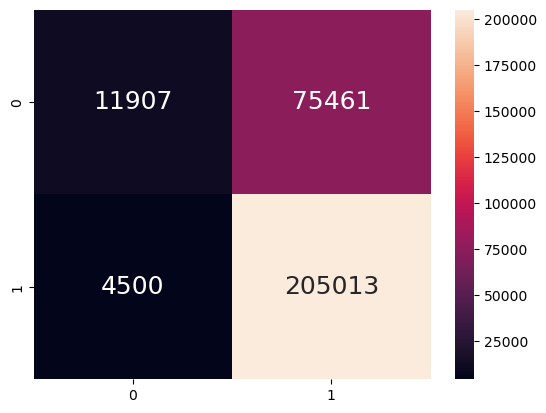

In [101]:
import seaborn as sb
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7305301214288521

TPR Test :	 0.977918402816462
TNR Test :	 0.138031325879873

FPR Test :	 0.861968674120127
FNR Test :	 0.022081597183537957


<AxesSubplot:>

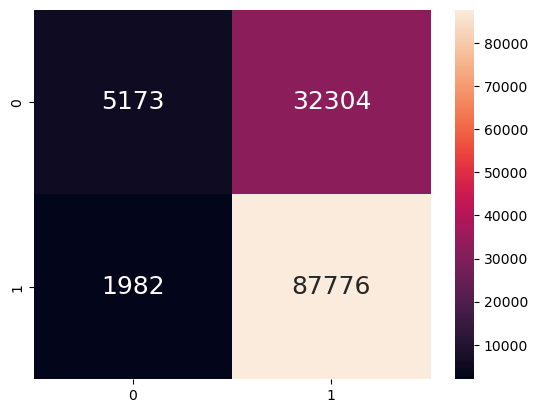

In [102]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Note the huge imbalance in the False Positives and False Negatives in the confusion matrix. False Positives are much higher in number than False Negatives in both Train and Test data. This is not surprising -- actually, this is a direct effect of the large Good vs Bad class imbalance in the response variable Rating. As Rating = Good was more likely in the data, False Positives are more likely too. Let's see if we can fix it.

## 3.2 Binary Decision Tree (with balanced classes)

## 3.3 Random Forest